In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# 1. Import et Nettoyage des Données
print("1. IMPORT ET NETTOYAGE DES DONNÉES")

# Chargement du dataset
df = pd.read_csv('WEEK_3/DAY_2/DATASET/global_power_plant_database.csv', low_memory=False)

# Affichage des informations sur le dataset
print("\nInformations sur le dataset :")
print(df.info())

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Nettoyage basique : remplacement des valeurs manquantes numériques par la médiane
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns
for col in colonnes_numeriques:
    # Méthode 1 (recommandée) :
    df[col] = df[col].fillna(df[col].median())

    # OU Méthode 2 (alternative) :
    # df.loc[:, col] = df[col].fillna(df[col].median())

1. IMPORT ET NETTOYAGE DES DONNÉES

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year         

In [6]:
# 2. Analyse Exploratoire des Données
print("\n2. ANALYSE EXPLORATOIRE")

# Statistiques descriptives des colonnes numériques
print("\nStatistiques descriptives :")
print(df.describe())

# Distribution des centrales par pays
print("\nTop 10 des pays par nombre de centrales :")
print(df['country'].value_counts().head(10))

# Distribution par type de combustible
print("\nDistribution par type de combustible :")
print(df['primary_fuel'].value_counts())


2. ANALYSE EXPLORATOIRE

Statistiques descriptives :
        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         2002.213173   
std      489.636072     22.638603     78.405850           17.215166   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         2007.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000         34936.000000         34936.000000   
mean             2018.667134           127.988808           154.588104   
std                 1.117514           957.739058          1046.708882   
min       

In [7]:
# 3. Analyse Statistique
print("\n3. ANALYSE STATISTIQUE")

# Analyse de la puissance par type de combustible
print("\nPuissance moyenne par type de combustible :")
puissance_par_combustible = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'std']).round(2)
print(puissance_par_combustible)

# Test ANOVA pour comparer les moyennes entre types de combustible
combustibles_principaux = df['primary_fuel'].value_counts().head(5).index
groupes = [df[df['primary_fuel'] == fuel]['capacity_mw'] for fuel in combustibles_principaux]
f_stat, p_value = stats.f_oneway(*groupes)
print(f"\nRésultat ANOVA :")
print(f"F-statistic : {f_stat:.2f}")
print(f"p-value : {p_value:.10f}")


3. ANALYSE STATISTIQUE

Puissance moyenne par type de combustible :
                   mean      std
primary_fuel                    
Biomass           23.97    39.46
Coal             843.58   888.19
Cogeneration      98.73   283.43
Gas              373.45   560.93
Geothermal        67.13   114.64
Hydro            147.17   549.81
Nuclear         2091.86  1303.51
Oil              112.88   392.01
Other             84.02   145.89
Petcoke          202.05   476.99
Solar             17.66    41.94
Storage           12.68    35.57
Waste             13.81    20.58
Wave and Tidal    55.22   101.44
Wind              49.22   106.14

Résultat ANOVA :
F-statistic : 2143.51
p-value : 0.0000000000



4. VISUALISATIONS


Text(0.5, 1.0, 'Distribution de la capacité par type de combustible')

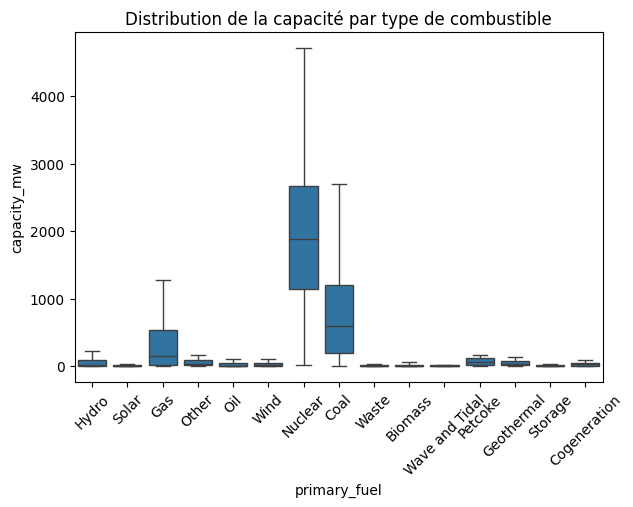

In [9]:
# 4. Visualisations
print("\n4. VISUALISATIONS")

# Configuration de la figure
fig = plt.figure(figsize=(15, 10))

# 1. Distribution de la capacité par type de combustible
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw', showfliers=False)
plt.xticks(rotation=45)
plt.title('Distribution de la capacité par type de combustible')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CHN'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'IND'),
  Text(3, 0, 'RUS'),
  Text(4, 0, 'JPN'),
  Text(5, 0, 'BRA'),
  Text(6, 0, 'CAN'),
  Text(7, 0, 'DEU'),
  Text(8, 0, 'FRA'),
  Text(9, 0, 'KOR')])

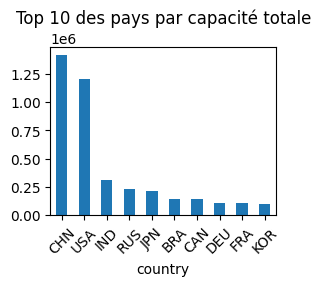

In [10]:
# 2. Top 10 des pays par capacité totale
plt.subplot(2, 2, 2)
capacite_par_pays = df.groupby('country')['capacity_mw'].sum().sort_values(ascending=False).head(10)
capacite_par_pays.plot(kind='bar')
plt.title('Top 10 des pays par capacité totale')
plt.xticks(rotation=45)

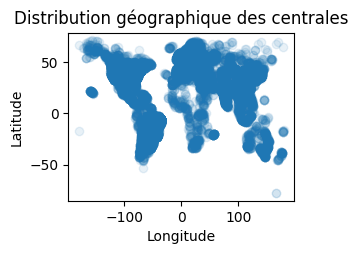

In [11]:
# 3. Distribution géographique
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.subplot(2, 2, 3)
    plt.scatter(df['longitude'], df['latitude'], alpha=0.1)
    plt.title('Distribution géographique des centrales')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

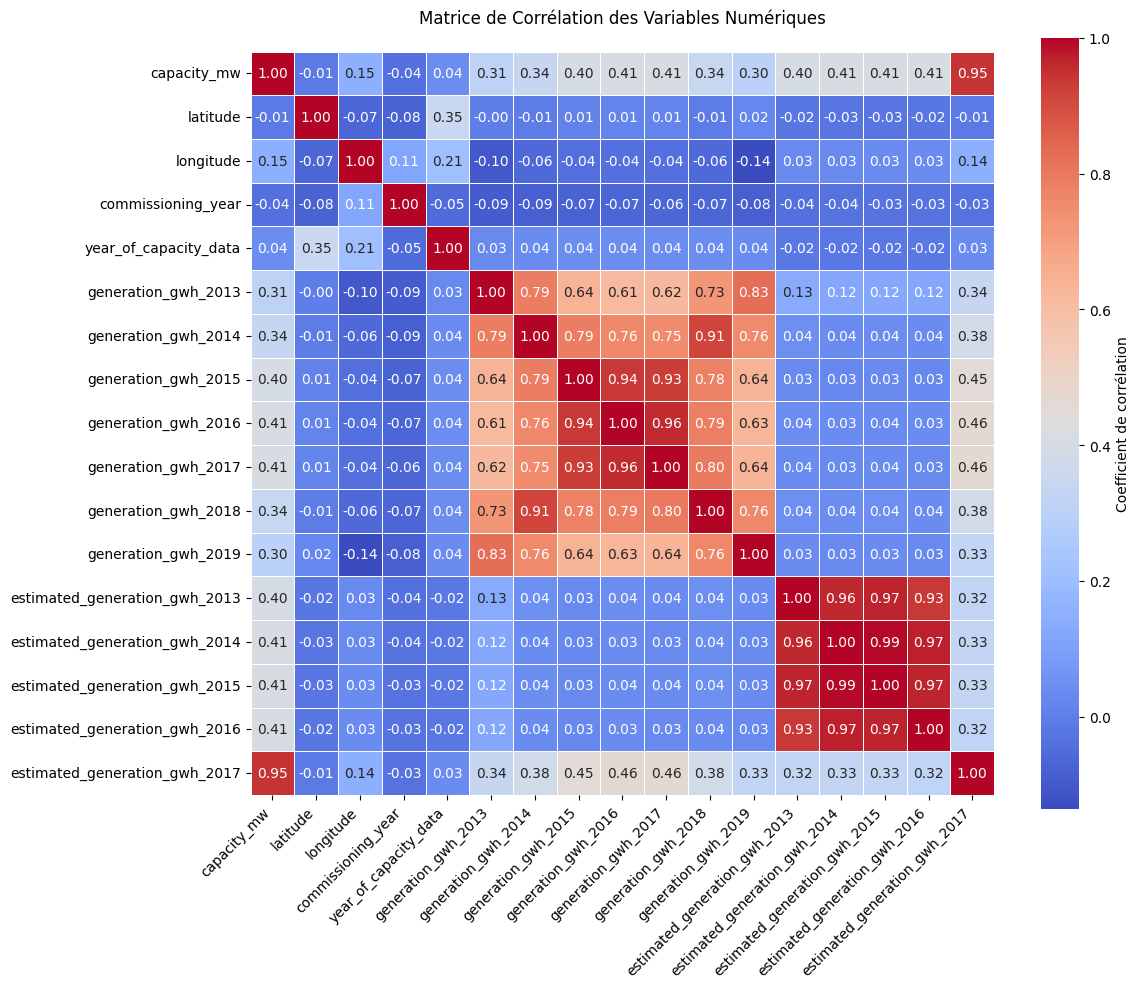

In [13]:
# Figure 2 : Matrice de corrélation dans une figure séparée et plus grande
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, 
            annot=True,           # Affiche les valeurs
            cmap='coolwarm',      # Palette de couleurs
            fmt='.2f',            # Format des nombres (2 décimales)
            square=True,          # Cellules carrées
            linewidths=0.5,       # Lignes entre les cellules
            cbar_kws={'label': 'Coefficient de corrélation'})  # Légende de la barre de couleur

plt.title('Matrice de Corrélation des Variables Numériques', pad=20)
plt.xticks(rotation=45, ha='right')  # Rotation des labels x
plt.yticks(rotation=0)
plt.tight_layout()  # Ajuste automatiquement les marges
plt.show()

In [5]:
print("5. OPÉRATIONS MATRICIELLES")

# Création d'une matrice de données numériques
donnees_numeriques = df.select_dtypes(include=[np.number]).dropna()
matrice = donnees_numeriques.values

# Calcul des valeurs et vecteurs propres
covariance = np.cov(matrice.T)
valeurs_propres, vecteurs_propres = np.linalg.eig(covariance)

print("\nValeurs propres principales :")
print(valeurs_propres[:3])

# Analyses supplémentaires
print("\nDimensions de la matrice de données :", matrice.shape)
print("\nNombre de variables numériques :", len(donnees_numeriques.columns))
print("\nNoms des variables numériques :")
print(donnees_numeriques.columns.tolist())

# Calcul de la proportion de variance expliquée
variance_totale = np.sum(valeurs_propres)
proportions = valeurs_propres / variance_totale
print("\nProportion de variance expliquée par les 3 premières composantes :")
print(proportions[:3].round(4))



5. OPÉRATIONS MATRICIELLES

Valeurs propres principales :
[6827597.96893525  385443.24073554   21665.48069989]

Dimensions de la matrice de données : (2431, 17)

Nombre de variables numériques : 17

Noms des variables numériques :
['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017']

Proportion de variance expliquée par les 3 premières composantes :
[0.94   0.0531 0.003 ]


6. Manipulation avancée avec NumPy et Pandas

Statistiques des centrales tropicales de grande capacité :
primary_fuel
Coal     281
Hydro    263
Gas      253
Oil       94
Solar     19
Name: count, dtype: int64


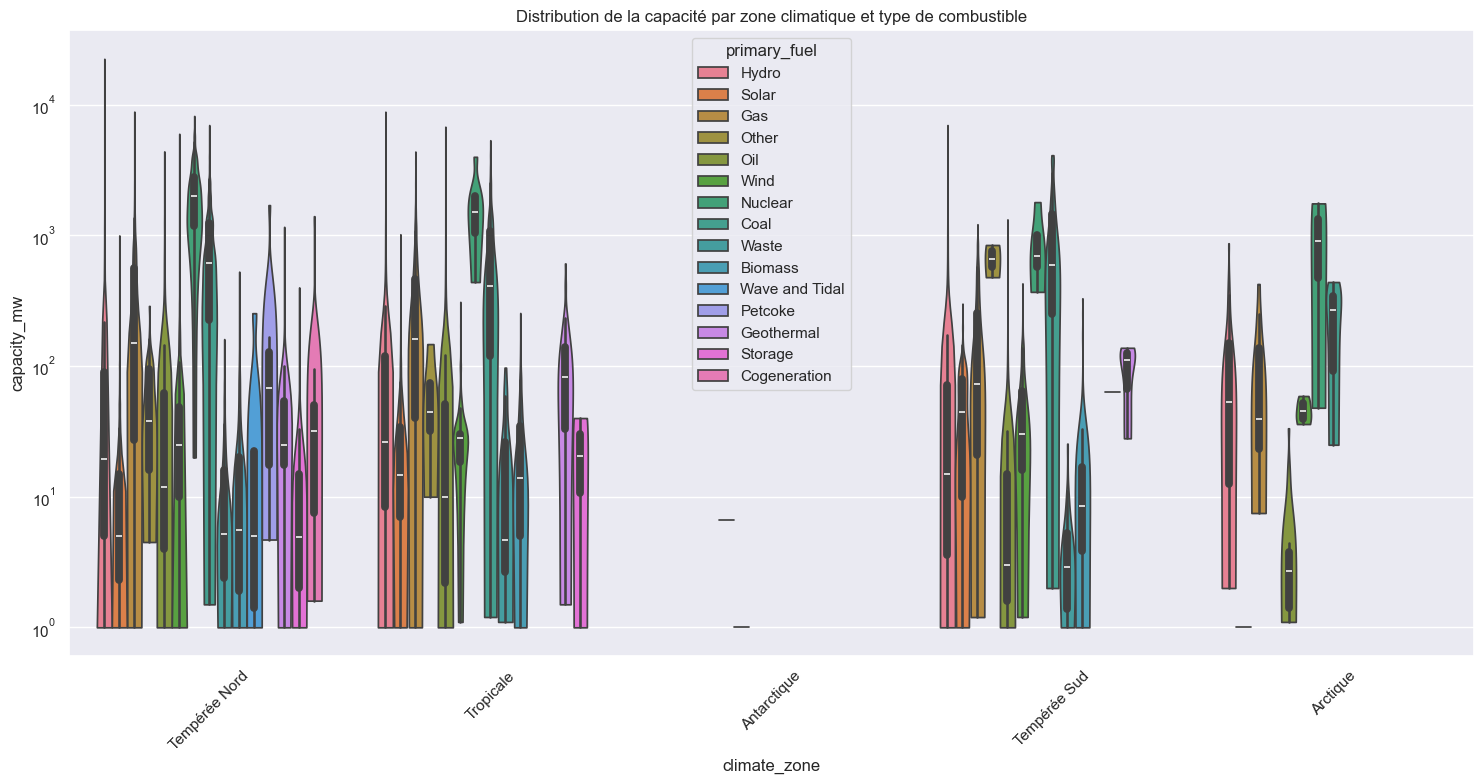

In [14]:
print("6. Manipulation avancée avec NumPy et Pandas")

# Filtrage complexe
condition = (df['capacity_mw'] > df['capacity_mw'].mean()) & \
           (df['latitude'].between(-23.5, 23.5))  # Zone tropicale
centrales_tropicales = df[condition]

print("\nStatistiques des centrales tropicales de grande capacité :")
print(centrales_tropicales['primary_fuel'].value_counts().head())

# Création du graphique
plt.figure(figsize=(15, 8))

# Fonction pour déterminer la zone climatique
def get_climate_zone(lat):
    if lat > 66.5:
        return 'Arctique'
    elif lat > 23.5:
        return 'Tempérée Nord'
    elif lat > -23.5:
        return 'Tropicale'
    elif lat > -66.5:
        return 'Tempérée Sud'
    else:
        return 'Antarctique'

# Application de la fonction
df['climate_zone'] = df['latitude'].apply(get_climate_zone)

# Création du violin plot avec la nouvelle syntaxe
sns.violinplot(data=df, 
               x='climate_zone', 
               y='capacity_mw', 
               hue='primary_fuel',
               cut=0, 
               density_norm='width')  # Nouveau paramètre au lieu de scale='width'

plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution de la capacité par zone climatique et type de combustible')
plt.tight_layout()
plt.show()


